# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (5)

**02/10/2023**

# Análisis Descriptivo

Vamos a estudiar ahora un conocido conjunto de datos, para ello analizaremos y visualizaremos el siguiente dataset.

##  [Fisher’s Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

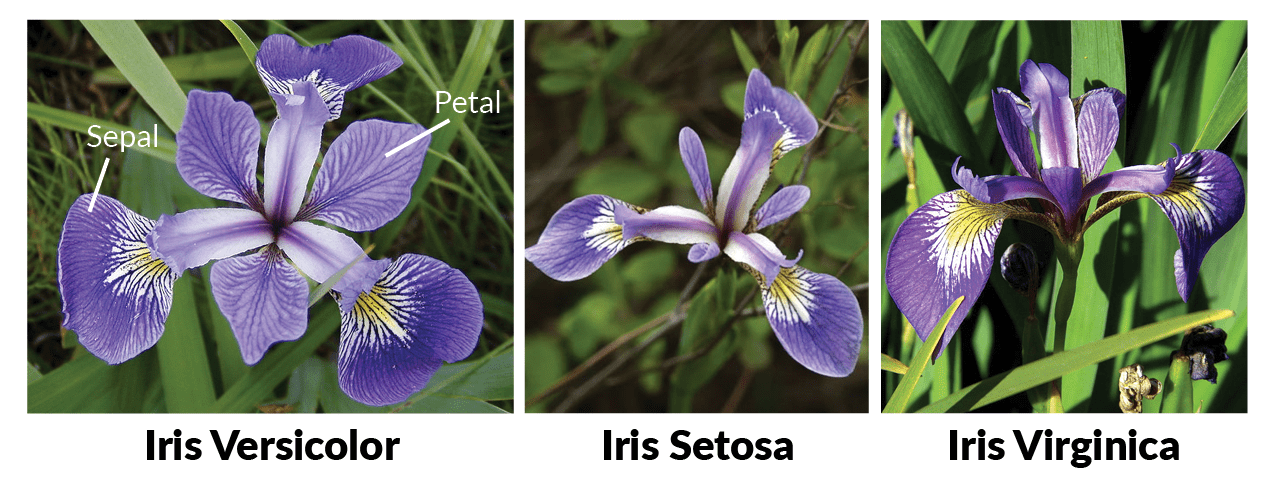



* El conjunto de datos de flores de Iris  es un conjunto de datos multivariante introducido por el estadístico y biólogo británico **Ronald Fisher** 
* El conjunto de datos consta de **50 muestras** de cada una de **las tres especies de Iris**:
    * Iris **setosa**
    * Iris **virginica** 
    * Iris **versicolor**  
        
* Se midieron cuatro características de cada muestra:
    * el **largo** de los **pétalos**, en centímetros.
    * el **ancho** de los **pétalos**, en centímetros.
    * el **largo** de los **sépalos**, en centímetros.
    * el **ancho** de los **sépalos**, en centímetros.  
  
* Basado en la combinación de estas cuatro características, Fisher desarrolló un modelo discriminante lineal para **distinguir las especies** entre sí.    

In [2]:
# importamos las librerías necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# importamos los datos del ejemplo Fisher’s Iris data set
from sklearn.datasets import load_iris

In [4]:
# Construimos un dataframe con los datos medidos 
dataset = pd.DataFrame(load_iris()["data"],columns=load_iris()["feature_names"])

# Añadimos la especie como etiqueta
dataset["label"] = load_iris()["target_names"][load_iris()["target"]]

dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# Para hacernos una idea de cómo queda el dataframe podemos mostrar las 10 primeras filas
dataset.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [6]:
# Sacamos el tamaño del dataset completo
dataset.shape

(150, 5)

In [7]:
# Las etiquetas de filas y columnas
print(dataset.index)
print("\n")
print(dataset.columns)

RangeIndex(start=0, stop=150, step=1)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')


In [8]:
# La frecuencia del label nos da el número de flores de cada especie que estamos analizando 
dataset['label'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: label, dtype: int64

In [9]:
# Para analizar mejor la información, podemos observar las estadísticas principales de los datos
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Si queremos determinar la media y la mediana de las diferentes especies de flores presentes en el conjunto de datos. podemos usar el método **groupby()** usando como clave la especie de cada flor.

In [10]:
dataset.groupby('label').agg(['mean', 'median'])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                        mean median             mean median              mean   
label                                                                           
setosa                 5.006    5.0            3.428    3.4             1.462   
versicolor             5.936    5.9            2.770    2.8             4.260   
virginica              6.588    6.5            2.974    3.0             5.552   

                  petal width (cm)         
           median             mean median  
label                                      
setosa       1.50            0.246    0.2  
versicolor   4.35            1.326    1.3  
virginica    5.55            2.026    2.0

Una vez hemos analizado brevemente los valores de la tabla, pasaremos a visualizar los mismo con los siguientes diagramas:

### Scatterplot
Un diagrama de **dispersión (_scatterplot_)** es un tipo de diagrama matemático que utiliza las coordenadas cartesianas para mostrar los valores de dos variables para un conjunto de datos.

En este caso vamos a **comparar el ancho y el largo del sépalo** en las distintas especies de flores.  
  
Para ello usamo las gráficas de **[Seaborn](https://seaborn.pydata.org/)** que es una librería de visualización de datos de Python basada en **matplotlib**, con una interfaz de alto nivel que nos permite dibujar gráficos estadísticos atractivos y muy intuitivos.

In [11]:
# Importamos la librería usando su acrónimo universal 
import seaborn as sns

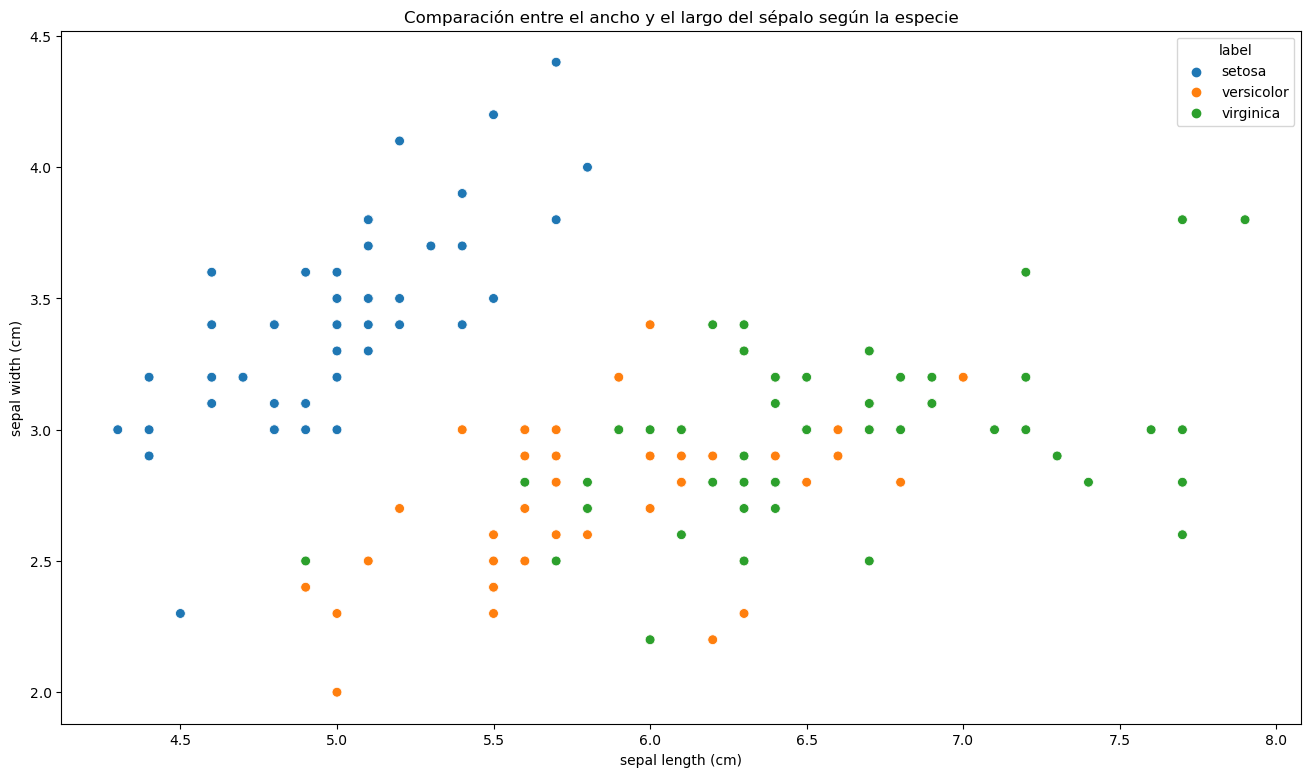

In [12]:
# Gráfico comparativo del ancho y el largo del sépalo 
plt.figure(figsize=(16,9))
sns.scatterplot(x = dataset['sepal length (cm)'], y = dataset['sepal width (cm)'], hue = dataset['label'], s= 50)
plt.title('Comparación entre el ancho y el largo del sépalo según la especie')
plt.show()



Observando el gráfico de dispersión (scatterplot) anterior podemos decir que **la especie _iris-setosa_ tiene el sépalo más pequeño pero también el más ancho**. La especie **versicolor** se encuentra casi en el **medio** tanto en longitud como en ancho. Mientras que la especie **virginica** tiene sépalos más largos.

### Pairplot 
**`pairplot`** representa la relación entre diferentes pares de variables presentes en el dataset. Los gráficos diagonales se tratan de la distribución de cada variable. 

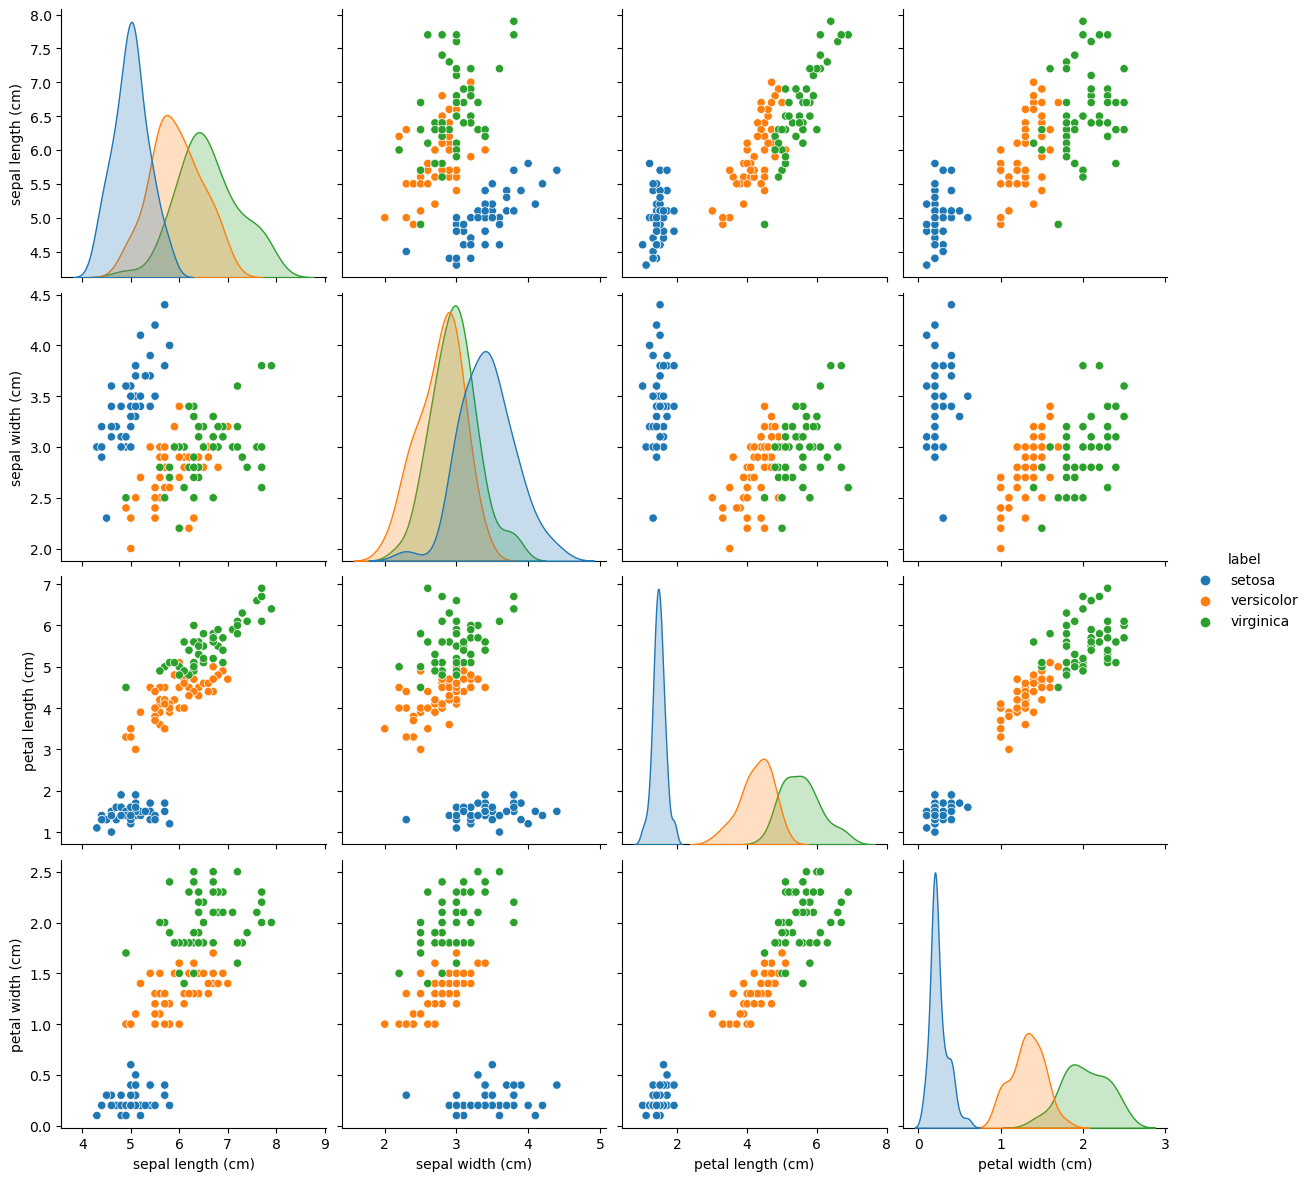

In [13]:
sns.pairplot(dataset, hue="label", height=3)
plt.show()

Observando la relación entre diferentes conjuntos de variable podemos ver que:  
- Las flores de especie _setosa_ en general tienen una gran diferencia en sus características en comparación con las otras especies. 
- Las flores de especie _versicolor_ suelen tener dimensiones medianas tanto de sépalo como de pétalo. Mientras la especie _virginica_ tiene pétalos anchos y largos, y sépalos no muy anchos pero largos.

### Heatmap
Uno de los aspectos más importantes entre las variables es la **correlación**. El método __`.corr()`__ en _pandas DataFrames_ calcula la correlación por pares de columnas (excluyendo valores nulos) que son básicamente **la fuerza de la relación lineal entre dos variables continuas**.

Para estudiar visualmente la correlación entre variables podemos usar los **mapas de calor**.

C:\Users\aleja\AppData\Local\Temp\ipykernel_10212\113635908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap='Blues', annot = True)


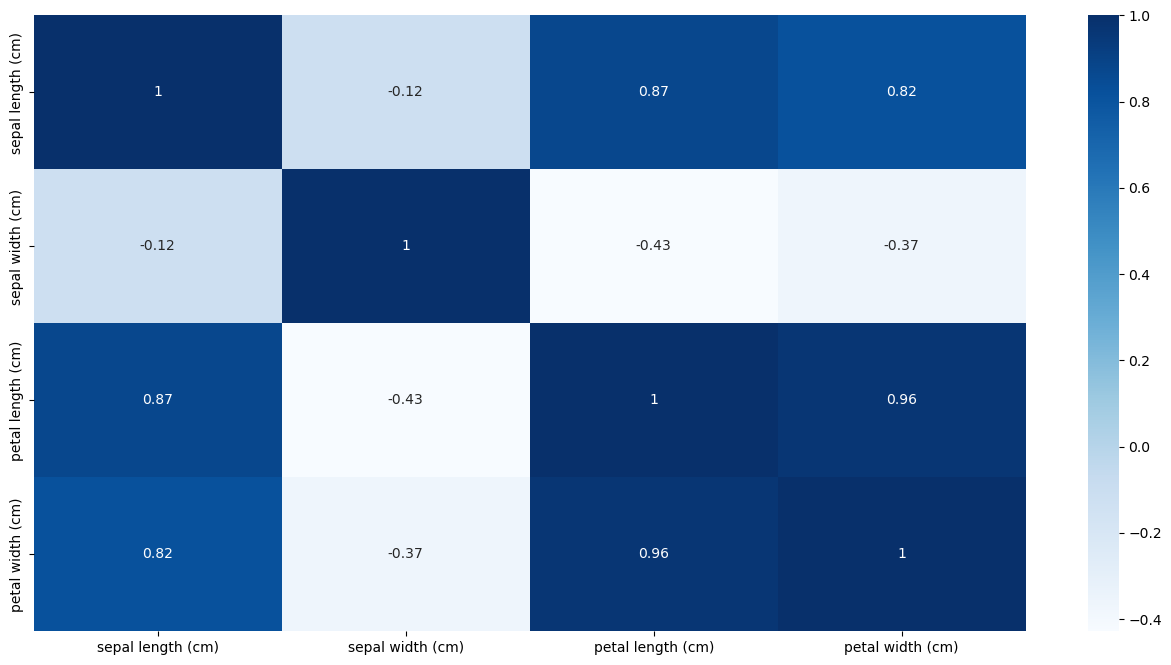

In [14]:
plt.figure(figsize = (16,8))
sns.heatmap(dataset.corr(), cmap='Blues', annot = True)
plt.show()

* En el mapa de calor vemos que el largo del pétalo (**_petal length_**) y el ancho del pétalo (**_petal width_**) tienen una **alta correlación**. 
* _petal width_ y _sepal length_ tienen una buena correlación. 
* También hay una correlación entre _petal length_ y _sepal length_.

### Histogramas
Veamos la distribución de los datos para las distintas columnas de nuestro conjunto de datos.

(array([ 2.,  9., 26., 11.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,
         2.,  4.,  8.,  6., 12.,  8.,  9., 12.,  4.,  5.,  9.,  5.,  5.,
         1.,  1.,  3.,  1.]),
 array([1.        , 1.19666667, 1.39333333, 1.59      , 1.78666667,
        1.98333333, 2.18      , 2.37666667, 2.57333333, 2.77      ,
        2.96666667, 3.16333333, 3.36      , 3.55666667, 3.75333333,
        3.95      , 4.14666667, 4.34333333, 4.54      , 4.73666667,
        4.93333333, 5.13      , 5.32666667, 5.52333333, 5.72      ,
        5.91666667, 6.11333333, 6.31      , 6.50666667, 6.70333333,
        6.9       ]),
 <BarContainer object of 30 artists>)

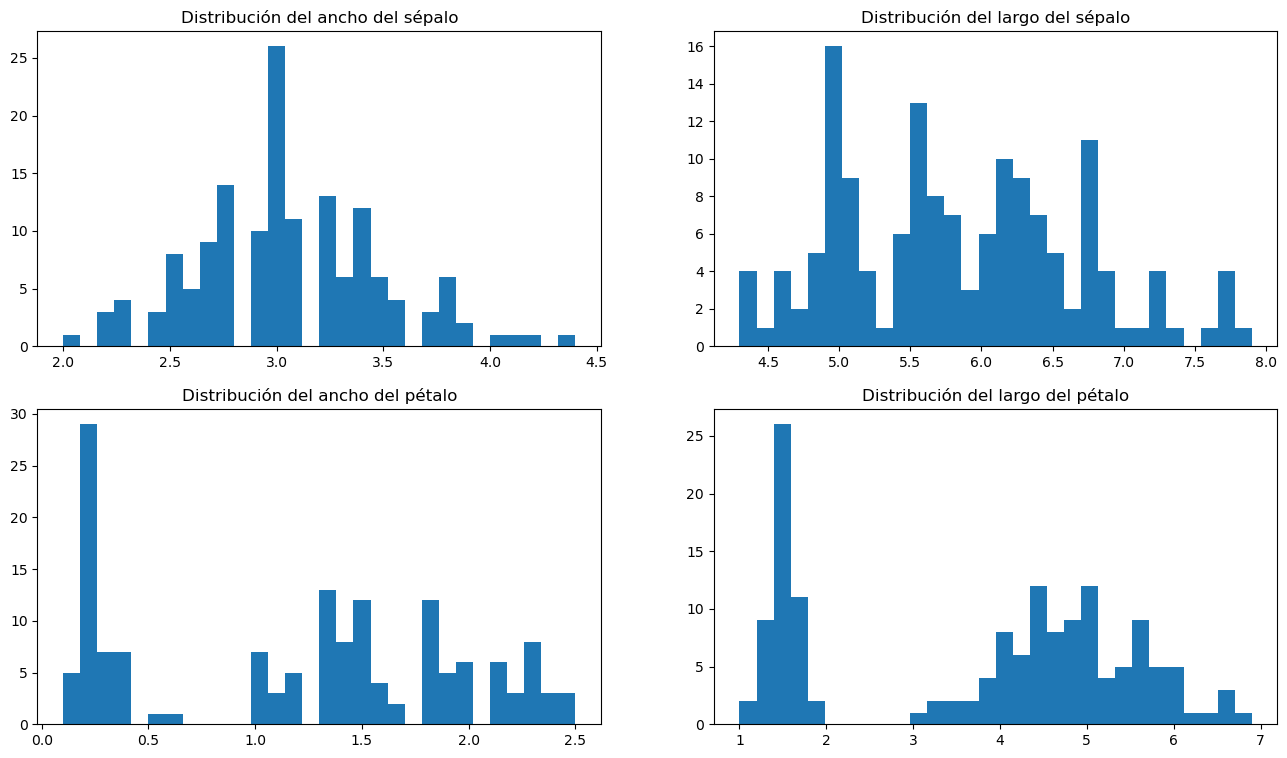

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribución del ancho del sépalo")
axes[0,0].hist(dataset['sepal width (cm)'], bins=30)

axes[0,1].set_title("Distribución del largo del sépalo")
axes[0,1].hist(dataset['sepal length (cm)'], bins=30)

axes[1,0].set_title("Distribución del ancho del pétalo")
axes[1,0].hist(dataset['petal width (cm)'], bins=30)

axes[1,1].set_title("Distribución del largo del pétalo")
axes[1,1].hist(dataset['petal length (cm)'], bins=30)

Se ve que las medidas del pétalo (**_petal width_** y **_petal length_**) contienen grupos más diversos y por lo tanto se pueden considerar como factores más **discriminatorios**.

### BoxPlot
Un **diagrama de caja** (boxplot) es una forma estandarizada de mostrar la distribución de datos basada en un resumen de cinco números:  
- mínimo  
- primer cuartil (Q1)
- mediana
- tercer cuartil (Q3)
- máximo  

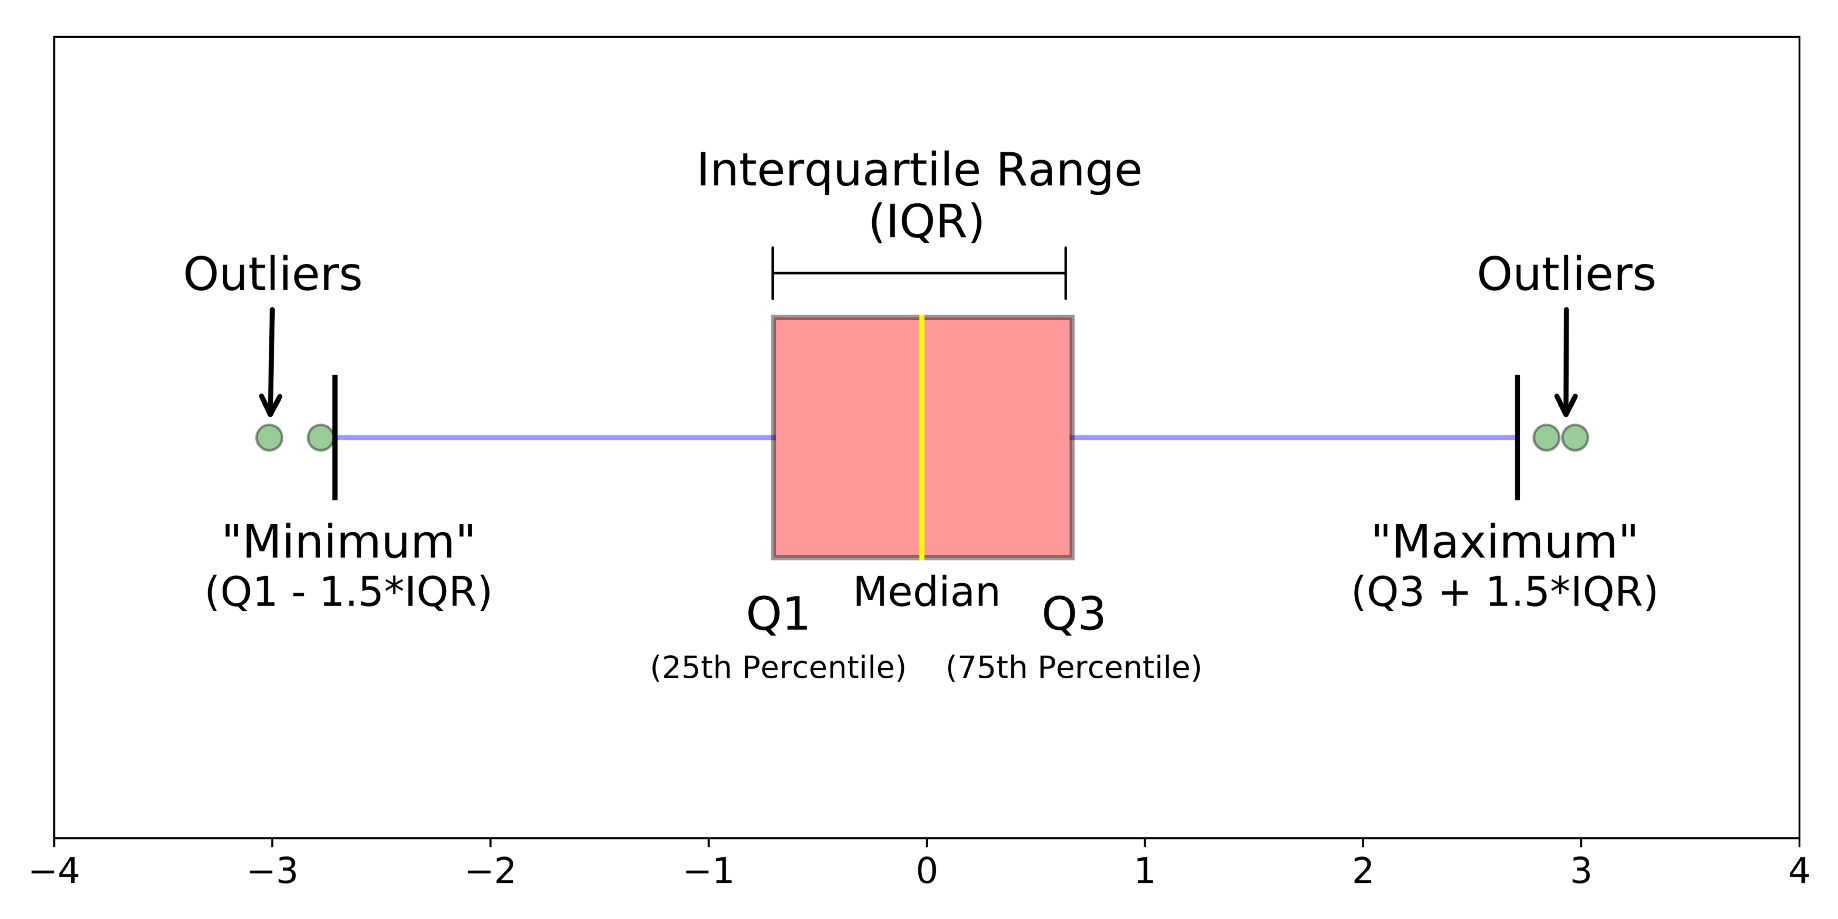

Este diagrama sirve sobre todo para informar de los **valores atípicos**. También puede indicar si los datos son simétricos, si están estrechamente agrupados y etc.

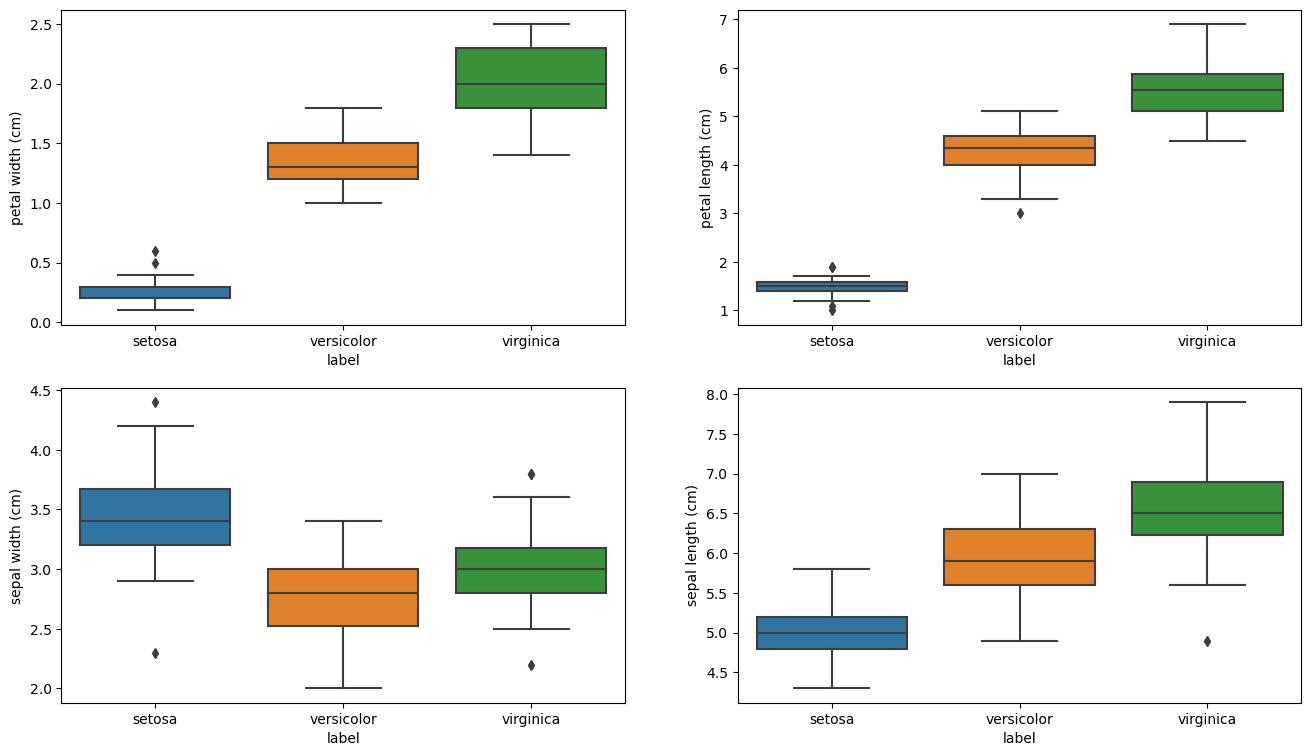

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(y="petal width (cm)", x= "label", data=dataset,  orient='v' , ax=axes[0, 0])
sns.boxplot(y="petal length (cm)", x= "label", data=dataset,  orient='v' , ax=axes[0, 1])
sns.boxplot(y="sepal width (cm)", x= "label", data=dataset,  orient='v' , ax=axes[1, 0])
sns.boxplot(y="sepal length (cm)", x= "label", data=dataset,  orient='v' , ax=axes[1, 1])
plt.show()

Vemos que los diagramas de caja (**_boxplot_**) describen que:
- la especie ***setosa*** generalmente tiene características más **pequeñas**.  
- La especie ***versicolor*** tiene características **medianas**.  
- La especie ***virginica*** tiene características más **grandes**.

### Violin plot
Podemos observar mejor las distribuciones usando el diagrama de violín en nuestro conjunto de datos. Este idgrama combina el ___boxplot___ con __curvas de densidad de probabilidad__ de los datos en diferentes valores.

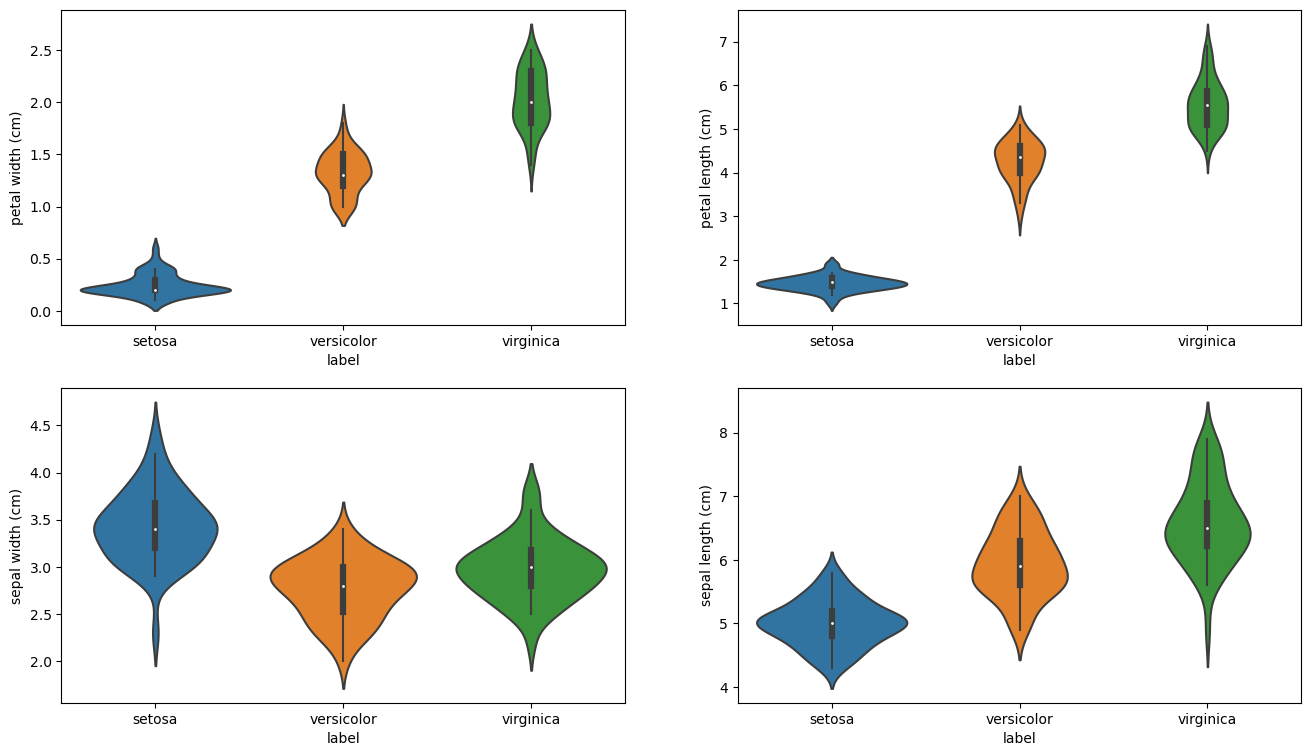

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="petal width (cm)", x= "label", data=dataset,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal length (cm)", x= "label", data=dataset,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal width (cm)", x= "label", data=dataset,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal length (cm)", x= "label", data=dataset,  orient='v' , ax=axes[1, 1])
plt.show()

### Conclusiones
* Este conjunto de datos está **equilibrado**, es decir, existen las mismas cantidades de registros para las tres especies.
* Tenemos cuatro columnas numéricas y solo **una columna categórica**.
* Existe una fuerte **correlación** entre el **ancho** y el **largo** de los **pétalos**.
* La especie **Setosa** es la más fácilmente distinguible debido a su **pequeño tamaño**.
* Las especies _Versicolor_ y _Virginica_ generalmente se confunden y a veces son difíciles de separar, aunque **Versicolor** tiene características de **tamaño medio** y **Virginica** tiene características de **tamaños más grandes**.

---

### **`Ejercicio 5.1`**

Conseguimos el Dataset de [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) que contiene datos del consumo de combustible de diversos modelos de coches. 

**`5.1.1`** Representa gráficamente los coeficientes de correlación entre las variables del dataset en un mapa de calor.  
      
**`5.1.2`** Dibuja un diagrama de dispersión entre el peso y la potencia, pintando los puntos del gráfico de colores distintos según el número de cilindros.  

**`5.1.3`** Dibuja un diagrama de dispersión entre el peso y la potencia, pintando los puntos del gráfico de colores distintos según el año de fabricación.  

**`5.1.4`** Comparando los dos gráficos, ¿podemos decir qué criterio tiene más capacidad para agrupar a los coches o mejor dicho es un factor discriminatorio mayor que el otro?  

**`5.1.5`** Saca el mismo gráfico que dibujaste en el ejercicio `5.1.3`, esta vez solamente para los coches fabricados en el año __70__.  

**`5.1.6`** Saca el mismo gráfico que dibujaste en el ejercicio `5.1.3`, esta vez solamente para los coches fabricados en el año __80__.  

**`5.1.7`** ¿Cuáles son las diferencias más destacables entre las relaciones dibujadas del año 70 y del año 80?


In [18]:
### Ejercicio 5.1

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cilindros', 'desplazamiento','potencia',
            'peso', 'aceleración', 'año', 'origen', 'nombre'],
            na_values='?')

# El DataFrame que se carga
mpg_data

,mpg,cilindros,desplazamiento,potencia,peso,aceleración,año,origen,nombre
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [19]:
# Modificar los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"


C:\Users\aleja\AppData\Local\Temp\ipykernel_10212\1715547458.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mpg_data.corr(), cmap='Reds', annot = True)


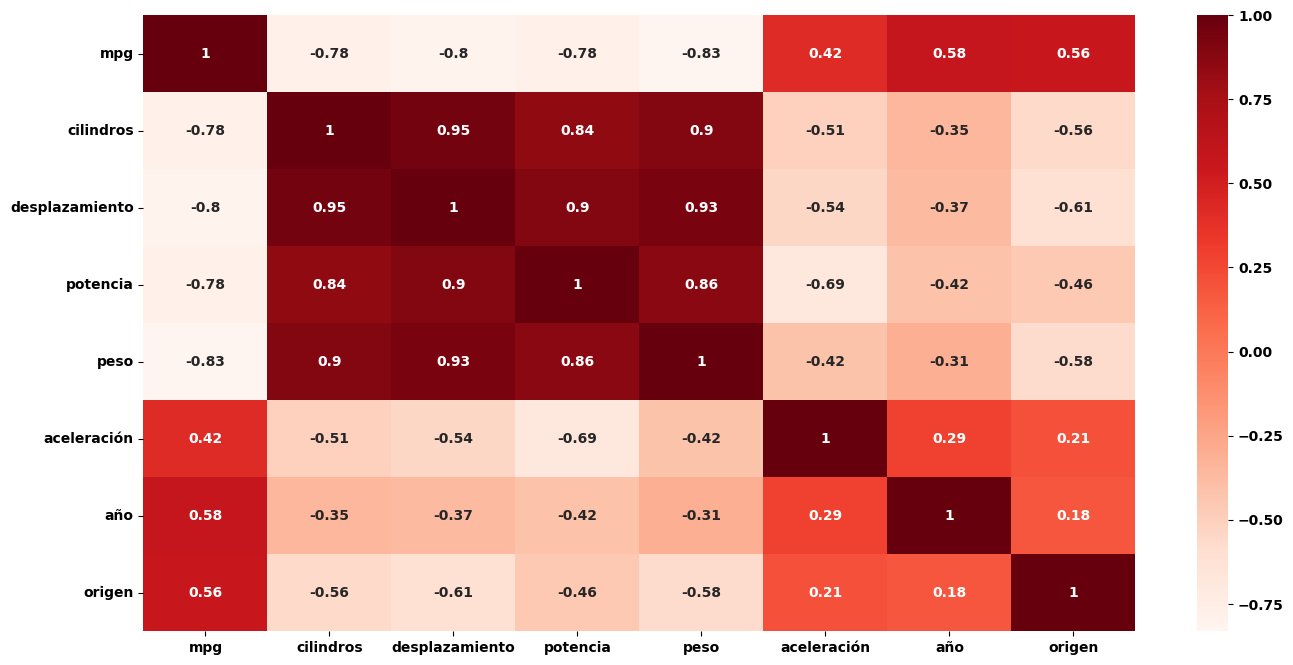

In [20]:
## Solución
# Ejercicio 5.1.1
plt.figure(figsize = (16,8))
sns.heatmap(mpg_data.corr(), cmap='Reds', annot = True)
plt.show()

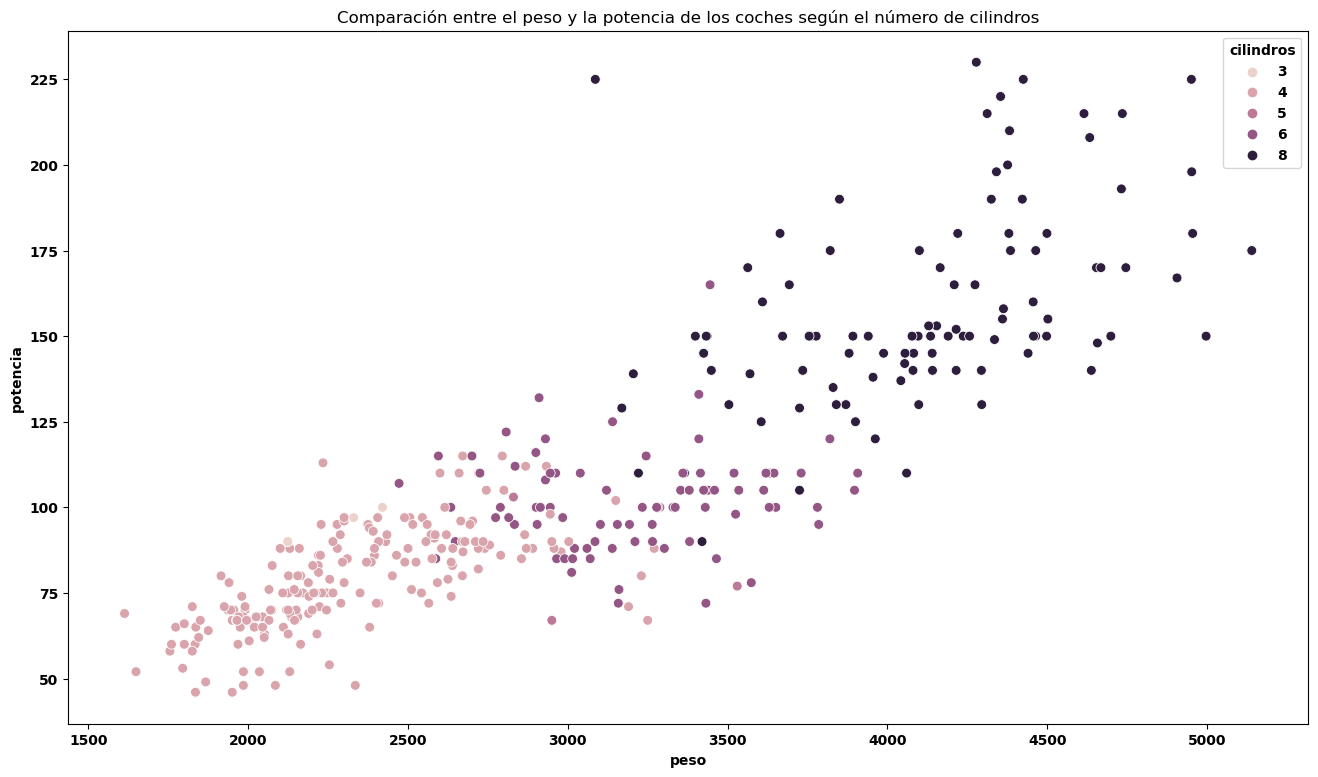

In [21]:
## Solución
# Ejercicio 5.1.2
plt.figure(figsize=(16,9))
sns.scatterplot(x = mpg_data['peso'], y = mpg_data['potencia'], hue = mpg_data['cilindros'], s= 50)
plt.title('Comparación entre el peso y la potencia de los coches según el número de cilindros')
plt.show()

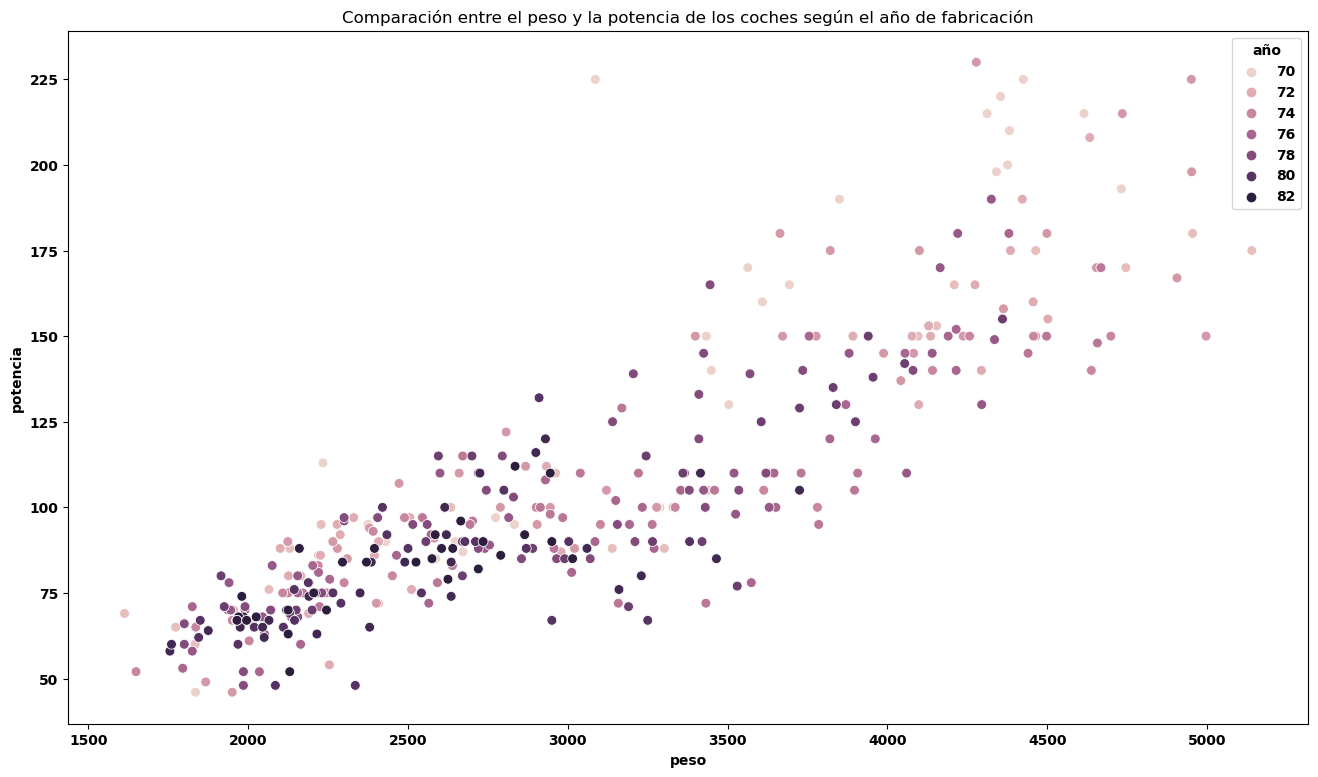

In [22]:
## Solución
# Ejercicio 5.1.3
plt.figure(figsize=(16,9))
sns.scatterplot(x = mpg_data['peso'], y = mpg_data['potencia'], hue = mpg_data['año'], s= 50)
plt.title('Comparación entre el peso y la potencia de los coches según el año de fabricación')
plt.show()

**`Solución Ejercicio 5.1.4`**

Es más discriminatorio si hacemos el análisis segun los cilindros, ya que en la gráfica del ejercicio 5.1.2 podemos observar que los puntos estan más grupados por colores y con una separación mayor entre colores.

En el diagrama de dispersión del ejercicio 5.1.3, se puede apreciar que los puntos estan más juntos y concentrados, lo que hace mucho más difícil diferenciarlos.

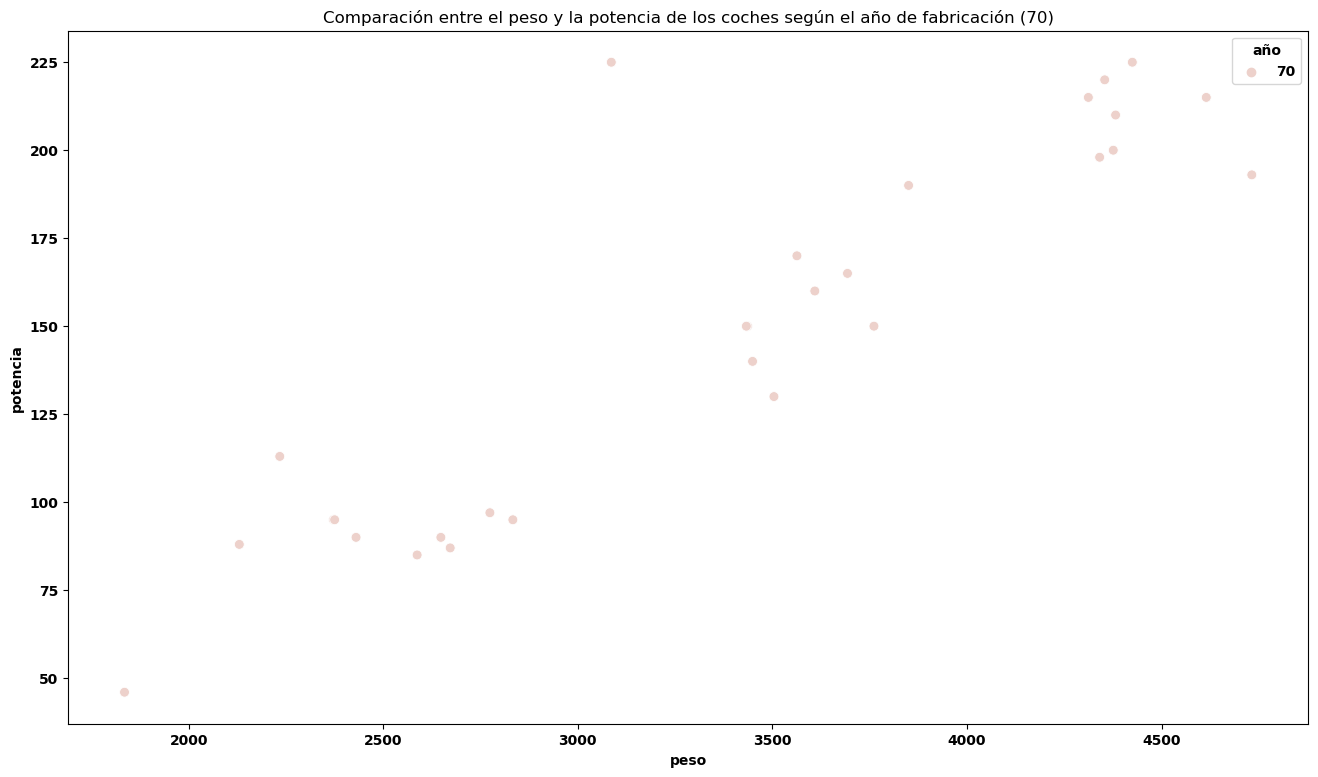

In [23]:
## Solución
# Ejercicio 5.1.5
plt.figure(figsize=(16,9))
mpg_data_80 = mpg_data[mpg_data['año'] == 70]
sns.scatterplot(x = mpg_data_80['peso'], y = mpg_data_80['potencia'], hue = mpg_data_80['año'], s= 50)
plt.title('Comparación entre el peso y la potencia de los coches según el año de fabricación (70)')
plt.show()

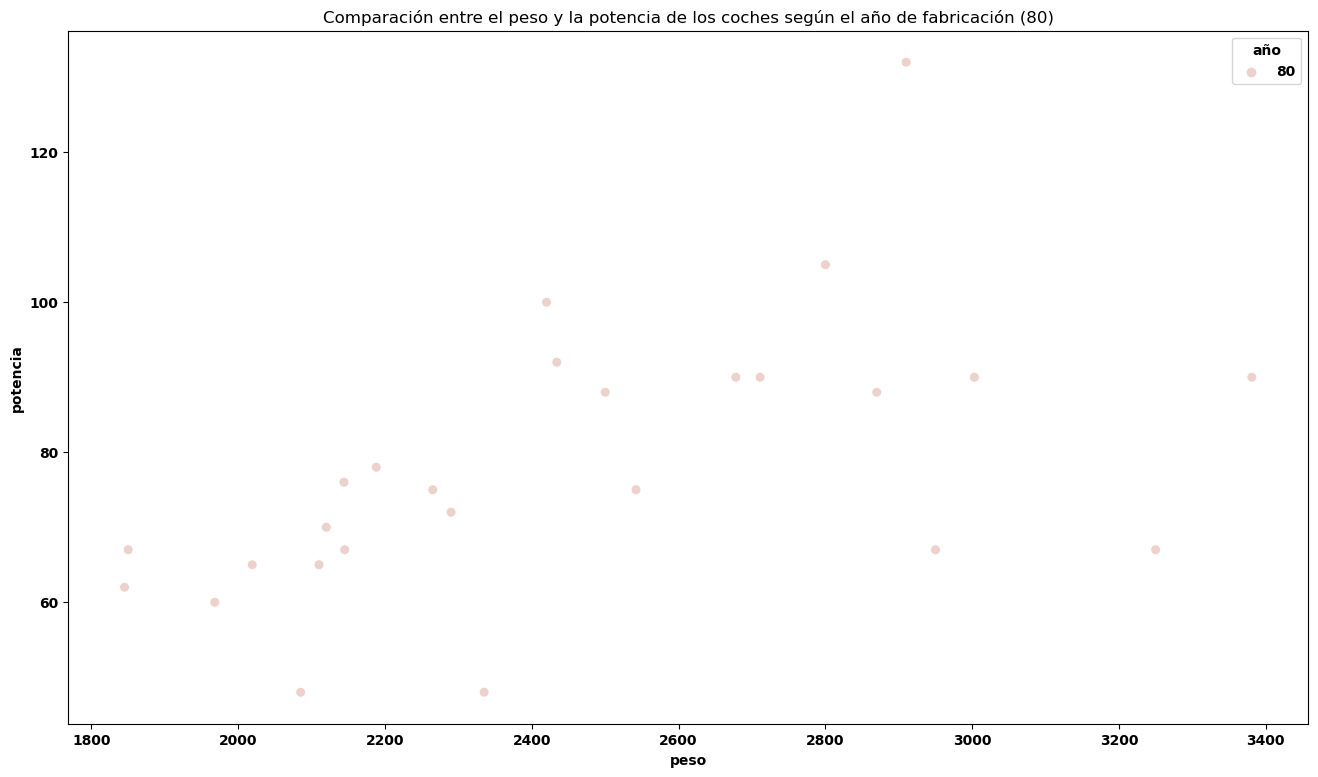

In [24]:
## Solución
# Ejercicio 5.1.6
plt.figure(figsize=(16,9))
mpg_data_80 = mpg_data[mpg_data['año'] == 80]
sns.scatterplot(x = mpg_data_80['peso'], y = mpg_data_80['potencia'], hue = mpg_data_80['año'], s= 50)
plt.title('Comparación entre el peso y la potencia de los coches según el año de fabricación (80)')
plt.show()

**`Solución Ejercicio 5.1.7`**

En el diagrama del ejercicio 5.1.5 podemos destacar, en comparación a las del ejercicio 5.1.6, que la potencia en el año 80 es algo menor en términos generales a la década anterior (año 70), pero es cierto que los coches del año 70 son considerablemente más pesados que los del año 80.

En la gráfica del año 80 existe también una dispersión más segmentada en comparación a las del año 70.

En el año 70 la grafica tiene una pendiente más pronunciada (a la vez que aumentaba el peso de los coches, aumentaba la potencia de los mismos), mientras que en el año 80 la pendiente es mucho menos notoria, también se debe a que los valores se mantienen en unos rangos menores, pero más cercanos a la media de potencia. 

A nivel gráfico se diferencia una relación más continua y curva en los años 70, comparado con una más recta en los años 80.

---

### **`Ejercicio 5.2`**

En un restaurante, un camarero registró los siguientes [datos](https://rdrr.io/cran/reshape2/man/tips.html) sobre todos los clientes durante un intervalo de dos meses y medio a principios del año 1990.  
El restaurante, ubicado en un centro comercial suburbano, era parte de una cadena nacional y servía un menú variado. En cumplimiento de la ley local, el restaurante ofrecía además sentarse en una sección para no fumadores a los clientes que así lo solicitaban.

**`5.2.1`** Saca todas las estadísticas principales de las variables numéricas del dataset.  

**`5.2.2`** Comprueba si hay valores perdidods en el dataset y si fuera así identifica en qué registros existen estos valores.  
   
**`5.2.3`** Clacula qué porcentaje de los clientes que dan propina son hombres y qué porcentaje son mujeres? basándonos en este dato, ¿podemos concluir qué género ha pagado más propinas?  
  
**`5.2.4`** Realiza varias agrupaciones de los datos según las siguientes variables, calculando el __tamaño__, la __mediana__ y la __media__ para cada grupo:  
- 'sex'  
- 'smoker'  
- 'day'  
- 'time'  
- 'size'  
  
**`5.2.5`** Dibuja una gráfica que muestre para cada grupo de diferentes números de personas, el promedio de las propinas pagadas.  
 
**`5.2.6`** Dibuja una serie de gráficas que muestren la relación entre las variables del dataset, pintando cada vez los puntos de datos según las siguientes variables:  
- 'sex'  
- 'smoker'  
- 'day'  
- 'time'  
- 'size'  

**`5.2.7`** Teniendo en cuenta todas las gráficas dibujadas anteriormente:
- ¿Cuále sería el factor diferenciador o discriminatorio que más afecta a la cantidad de las proponia recibidas por el camarero?   

**`5.2.8`** Teniendo en cuenta todas las gráficas dibujadas anteriormente:
- ¿Cuále sería el aspecto que afecta menos que las demás variables a la cantidad de las proponia recibidas por el camarero?  

**`5.2.9`** Calcula el tercer cuartil para la variable `tip` y filtra todo el dataset según este valor para que el _DataFrame_ resultante solamente contenga registros con cantidad de propinas que sean iguales o mayores que este importe.  

**`5.2.10`** Considerando todos los análisis realizados anteriormente, haz una recomendación al camarero para que lo tenga en cuenta a la hora de repartir los clientes entre el personal del restaurante, sugiriéndole los mejores valores para las siguientes variables, de modo que él pueda conseguir la mayor cantidad de proponas!!
- 'size'   
- 'day'  
- 'time'

In [25]:
### Ejercicio 5.2

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
## Solución
# Ejercicio 5.2.1
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [27]:
## Solución
# Ejercicio 5.2.2
tips.isna().sum() # No hay valores perdidos.

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [28]:
## Solución
# Ejercicio 5.2.3
print("porcentaje de propinas por sexo")

tips.groupby('sex').size() / tips.groupby('sex').size().sum() * 100

porcentaje de propinas por sexo


sex
Male      64.344262
Female    35.655738
dtype: float64

**`Solución Ejercicio 5.2.3`**

Dado que el porcentaje de hombres es de 64% (aproximadamente), y el de las mujeres es de aproximadamente 35%, podemos decir con certeza que es el camarero recibe más propinas cuando el cliente (o clientes) son hombres.

In [29]:
## Solución
# Ejercicio 5.2.4
# 'sex'
tips.groupby('sex').agg(['count', 'mean', 'median'])

C:\Users\aleja\AppData\Local\Temp\ipykernel_10212\491635525.py:4: FutureWarning: ['smoker', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tips.groupby('sex').agg(['count', 'mean', 'median'])


total_bill                     tip                   size            \
            count       mean median count      mean median count      mean   
sex                                                                          
Male          157  20.744076  18.35   157  3.089618   3.00   157  2.630573   
Female         87  18.056897  16.40    87  2.833448   2.75    87  2.459770   

               
       median  
sex            
Male      2.0  
Female    2.0

In [30]:

## Solución
# Ejercicio 5.2.4
# 'smoker'
tips.groupby('smoker').agg(['count', 'mean', 'median'])

C:\Users\aleja\AppData\Local\Temp\ipykernel_10212\3258618677.py:4: FutureWarning: ['sex', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tips.groupby('smoker').agg(['count', 'mean', 'median'])


total_bill                     tip                   size            \
            count       mean median count      mean median count      mean   
smoker                                                                       
Yes            93  20.756344  17.92    93  3.008710   3.00    93  2.408602   
No            151  19.188278  17.59   151  2.991854   2.74   151  2.668874   

               
       median  
smoker         
Yes       2.0  
No        2.0

In [31]:

## Solución
# Ejercicio 5.2.4
# 'day'
tips.groupby('day').agg(['count', 'mean', 'median'])

C:\Users\aleja\AppData\Local\Temp\ipykernel_10212\1187246936.py:4: FutureWarning: ['sex', 'smoker', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tips.groupby('day').agg(['count', 'mean', 'median'])


total_bill                     tip                   size            \
          count       mean median count      mean median count      mean   
day                                                                        
Thur         62  17.682742  16.20    62  2.771452  2.305    62  2.451613   
Fri          19  17.151579  15.38    19  2.734737  3.000    19  2.105263   
Sat          87  20.441379  18.24    87  2.993103  2.750    87  2.517241   
Sun          76  21.410000  19.63    76  3.255132  3.150    76  2.842105   

             
     median  
day          
Thur    2.0  
Fri     2.0  
Sat     2.0  
Sun     2.0

In [32]:

## Solución
# Ejercicio 5.2.4
# 'time'
tips.groupby('time').agg(['count', 'mean', 'median'])

C:\Users\aleja\AppData\Local\Temp\ipykernel_10212\3343733175.py:4: FutureWarning: ['sex', 'smoker', 'day'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tips.groupby('time').agg(['count', 'mean', 'median'])


total_bill                      tip                   size            \
            count       mean  median count      mean median count      mean   
time                                                                          
Lunch          68  17.168676  15.965    68  2.728088   2.25    68  2.411765   
Dinner        176  20.797159  18.390   176  3.102670   3.00   176  2.630682   

               
       median  
time           
Lunch     2.0  
Dinner    2.0

In [33]:
## Solución
# Ejercicio 5.2.4
# 'size'
tips.groupby('size').agg(['count', 'mean', 'median'])

C:\Users\aleja\AppData\Local\Temp\ipykernel_10212\2923209739.py:4: FutureWarning: ['sex', 'smoker', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tips.groupby('size').agg(['count', 'mean', 'median'])


total_bill                      tip                 
          count       mean  median count      mean median
size                                                     
1             4   7.242500   7.915     4  1.437500  1.415
2           156  16.448013  15.370   156  2.582308  2.500
3            38  23.277632  20.365    38  3.393158  3.290
4            37  28.613514  25.890    37  4.135405  3.760
5             5  30.068000  29.850     5  4.028000  5.000
6             4  34.830000  32.050     4  5.225000  5.000

C:\Users\aleja\AppData\Local\Temp\ipykernel_10212\3129558038.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  promedio_grupo = tips.groupby('size').mean()['tip']


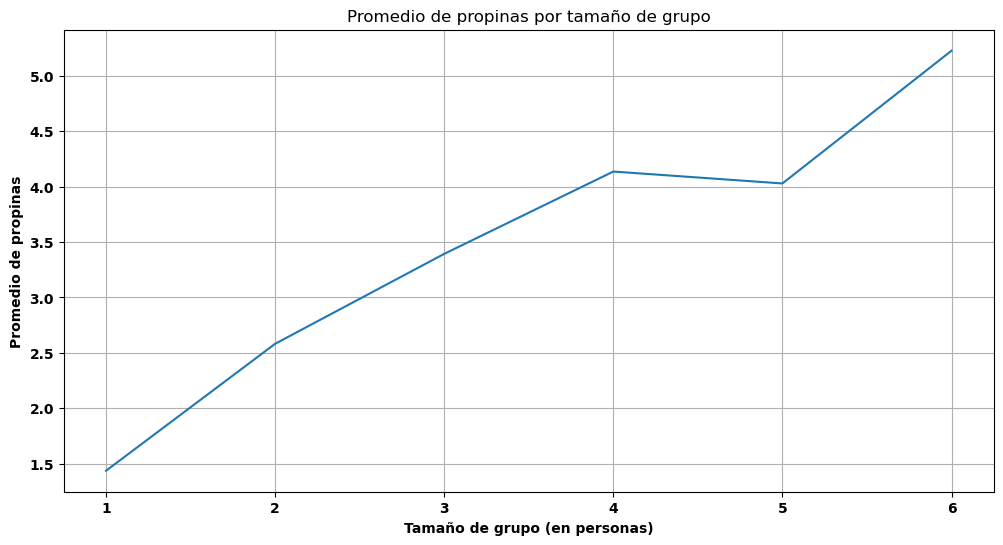

In [34]:
## Solución
# Ejercicio 5.2.5
promedio_grupo = tips.groupby('size').mean()['tip']

plt.title('Promedio de propinas por tamaño de grupo')
plt.xlabel('Tamaño de grupo (en personas)')
plt.ylabel('Promedio de propinas')
plt.grid()
plt.plot(promedio_grupo)

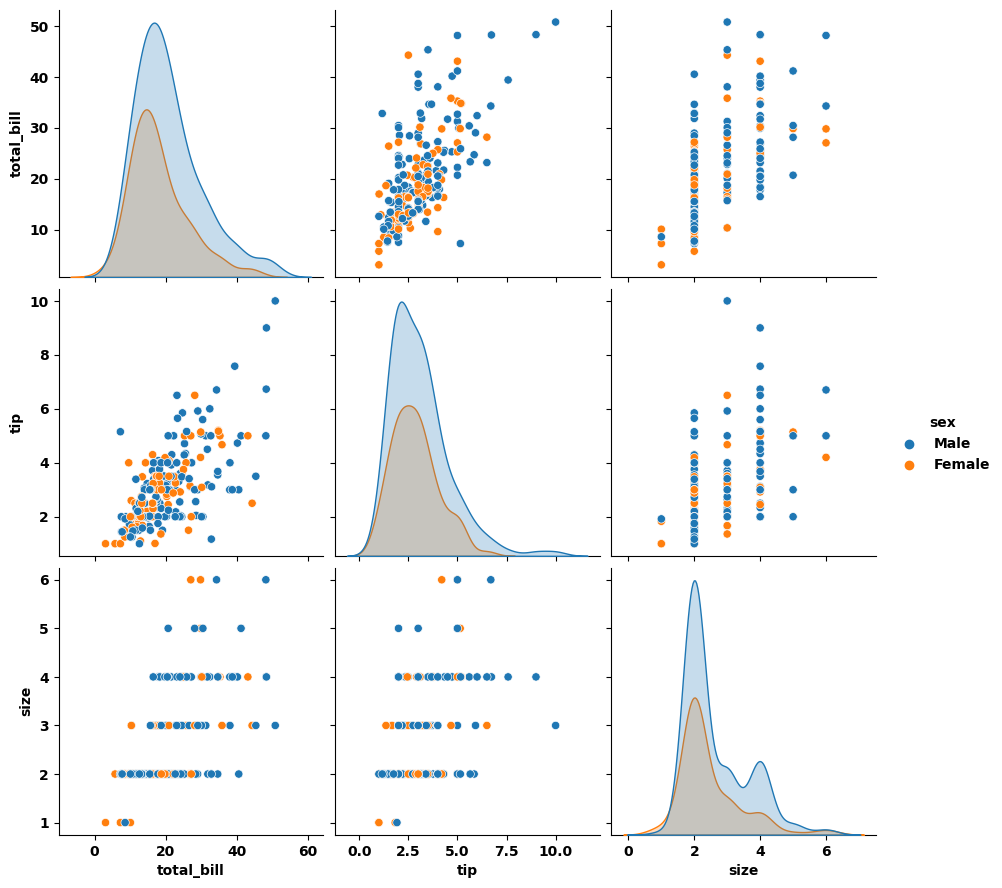

In [35]:
## Solución
# Ejercicio 5.2.6
# 'sex'
sns.pairplot(tips, hue='sex', height=3)
plt.show()

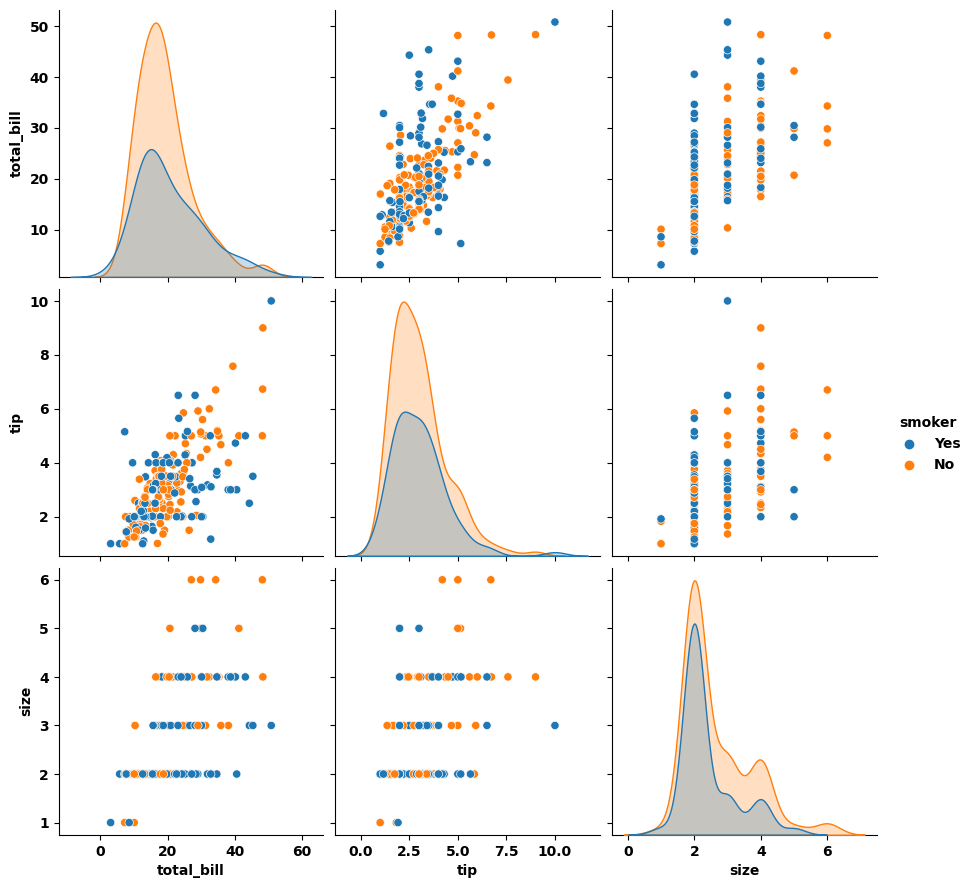

In [36]:
## Solución
# Ejercicio 5.2.6
# 'smoker'
sns.pairplot(tips, hue='smoker', height=3)
plt.show()

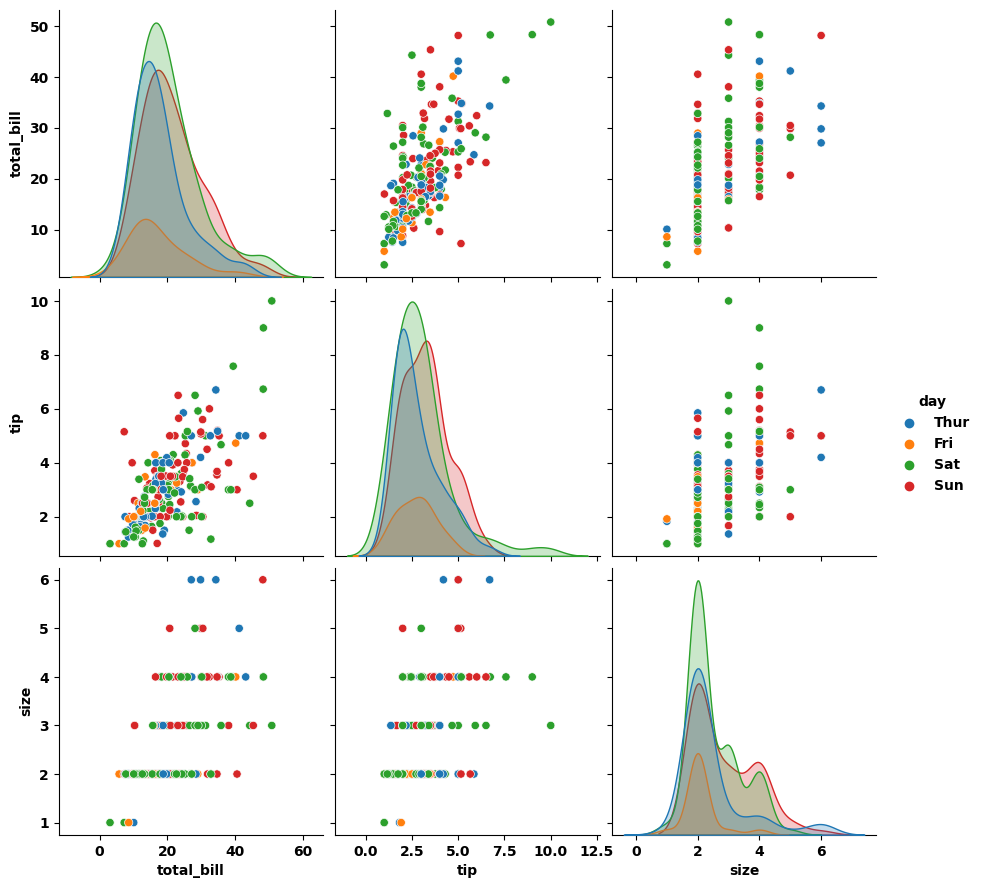

In [37]:
## Solución
# Ejercicio 5.2.6
# 'day'
sns.pairplot(tips, hue='day', height=3)
plt.show()

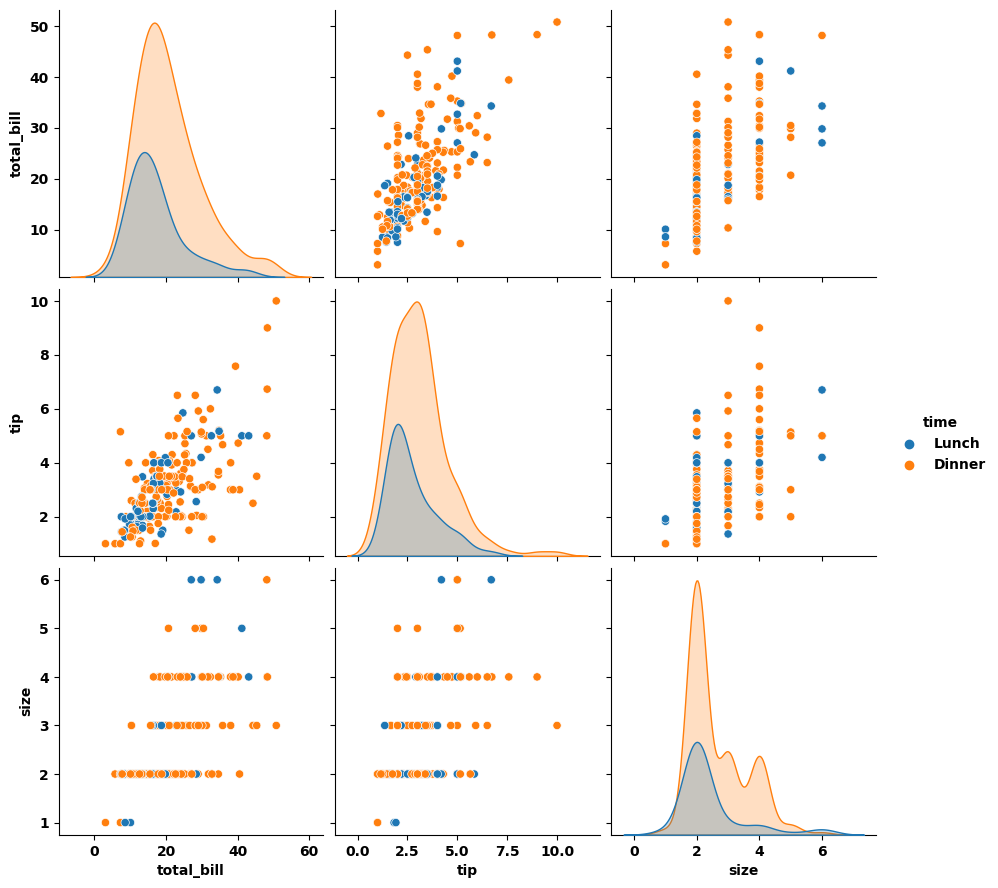

In [38]:
## Solución
# Ejercicio 5.2.6
# 'time'
sns.pairplot(tips, hue='time', height=3)
plt.show()

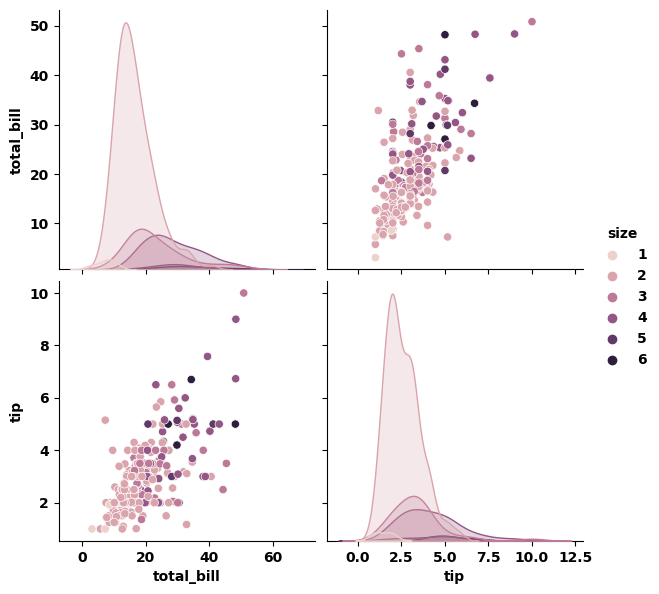

In [39]:
## Solución
# Ejercicio 5.2.6
# 'size'
sns.pairplot(tips, hue='size', height=3)
plt.show()

**`Solución ejercicio 5.2.7`**

Tras analizar los valores de las graficas para cada variable (columna), considero que la variable más determinante a la hora de que el camarero reciba propinas es la cantidad de personas que forman el grupo (**'size'**).

**`Solución ejercicio 5.2.8`**

Tras analizar las gráficas y la relación entre las variables, considero que la variable menos discrimanotira e identificativa a la hora de conocer cuales son los factores que determinan la cantidad de propinas que recibe el camarero es si es o no fumador (**'smoker'**).

In [40]:
## Solución
# Ejercicio 5.2.9
valor = tips.quantile(0.75)['tip'] # El valor es 3.5625

tips[tips.tip >= valor]

C:\Users\aleja\AppData\Local\Temp\ipykernel_10212\2398534351.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  valor = tips.quantile(0.75)['tip'] # El valor es 3.5625


,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
15,21.58,3.92,Male,No,Sun,Dinner,2
17,16.29,3.71,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
211,25.89,5.16,Male,Yes,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
238,35.83,4.67,Female,No,Sat,Dinner,3


**`Solución Ejercicio 5.2.10`**

En base al análisis hecho anteriormente, podemos considerar que el mejor día de la semana, el número de personas y la hora del día como los **DOMINGOS** a la hora de **CENAR** para un tamaño de grupo de **5-6** personas.